<a href="https://colab.research.google.com/github/Poziloi/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B_%D0%9D%D0%A1_%D0%B8_Transfer_Learning_%D0%A1%D0%BC%D1%8B%D1%81%D0%BB%D0%BE%D0%B2_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
# Ваш код
model = keras.applications.ResNet50V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="resnet50v2",
)

model.summary()

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 25,613,800 (97.71 MB)

 Trainable params: 25,568,360 (97.54 MB)

 Non-trainable params: 45,440 (177.50 KB)

### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [12]:
# Ваш код
images = []

img_1 = cv2.imread('/content/zebra.jpg')
img_1 = cv2.resize(img_1, (320, 320))

img_2 = cv2.imread('/content/saxophone.jpg')
img_2 = cv2.resize(img_2, (320, 320))

img_3 = cv2.imread('/content/ipod.jpeg')
img_3 = cv2.resize(img_3, (320, 320))

img_4 = cv2.imread('/content/broom.jpg')
img_4 = cv2.resize(img_4, (320, 320))

img_5 = cv2.imread('/content/bow.jpg')
img_5 = cv2.resize(img_5, (320, 320))

images.append(img_1)
images.append(img_2)
images.append(img_3)
images.append(img_4)
images.append(img_5)
images = np.array(images)

images.shape

(5, 320, 320, 3)

### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [17]:
# Ваш код
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = cv2.resize(image, (shape[0], shape[1]))
    proc_image = proc_image.reshape(shape[0], shape[1], shape[2])
    proc_images.append(proc_image)
  proc_images = np.array(proc_images)

  return proc_images

input_images = normalize(images, (224, 224, 3))

input_images = keras.applications.resnet_v2.preprocess_input(input_images)

input_images.shape

(5, 224, 224, 3)

### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

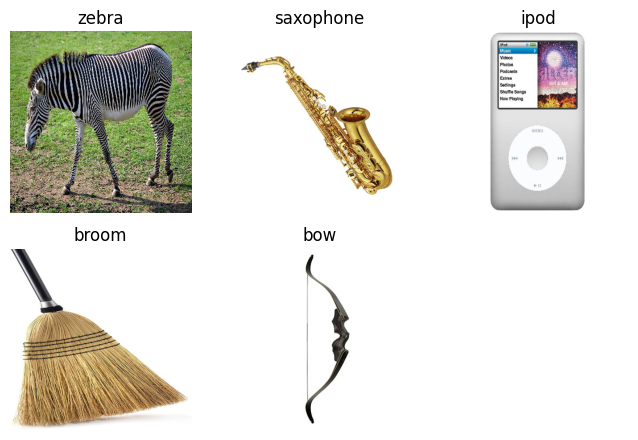

In [20]:
# Ваш код
class_name = ['zebra', 'saxophone', 'ipod', 'broom', 'bow']

plt.figure(figsize=(8, 8))
for i in range(5):
  image = images[i]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[:, :, ::-1])
  plt.title(class_name[i])
  plt.axis("off")

In [21]:
res = model.predict(input_images)
for i in res:
  print(np.argmax(i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
340
776
605
462
456


In [25]:
res.shape

(5, 1000)

In [29]:
true_res = keras.applications.resnet_v2.decode_predictions(res, top=3)
for i in range(5):
  print(true_res[i])

[('n02391049', 'zebra', 1.0), ('n01518878', 'ostrich', 8.131104e-09), ('n01798484', 'prairie_chicken', 2.204637e-09)]
[('n04141076', 'sax', 0.9977673), ('n03838899', 'oboe', 0.001068746), ('n03126707', 'crane', 0.00030154825)]
[('n03584254', 'iPod', 1.0), ('n04074963', 'remote_control', 2.5491701e-08), ('n02105251', 'briard', 1.8815413e-08)]
[('n02906734', 'broom', 0.9999658), ('n03876231', 'paintbrush', 3.4189103e-05), ('n04367480', 'swab', 3.8979646e-08)]
[('n02879718', 'bow', 0.99970824), ('n03109150', 'corkscrew', 0.00018889598), ('n03759954', 'microphone', 3.7880356e-05)]


# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [30]:
# Ваш код
basic_model = keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3),
    pooling='avg',
)

basic_model.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 32, 32, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 32, 32, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 34, 34, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
%%capture
!unzip animals.zip -d animals

In [38]:
'''
from imutils import paths
import random

imagesPath = sorted(list(paths.list_images('/content/animals/')))
random.shuffle(imagesPath)
'''

import pathlib

imagesPath = pathlib.Path('/content/animals/')

In [39]:
# Ваш код
img_h, img_w = 128, 128
batch_size = 54

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    imagesPath,
    validation_split = 0.2,
    subset='training',
    seed=420,
    image_size=(img_h, img_w),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    imagesPath,
    validation_split = 0.2,
    subset='validation',
    seed=420,
    image_size=(img_h, img_w),
    batch_size=batch_size
)

Found 7200 files belonging to 4 classes.
Using 5760 files for training.
Found 7200 files belonging to 4 classes.
Using 1440 files for validation.


In [40]:
class_names = train_ds.class_names
print(class_names)

['chicken', 'cow', 'horse', 'sheep']


### 2.3. Обучение своей модели на основе предобученной модели "ResNet50V2"

In [51]:
for layer in basic_model.layers:
  layer.trainable = False

In [54]:
# Ваш код
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input

input_tensor = basic_model.input
x = basic_model.output

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output_tensor = Dense(4, activation='softmax')(x)

my_new_model = Model(inputs=input_tensor, outputs=output_tensor)

my_new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 32, 32, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 32, 32, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 34, 34, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 24,615,940 (93.90 MB)

 Trainable params: 1,051,140 (4.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [55]:
my_new_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [57]:
history = my_new_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 480s 4s/step - accuracy: 0.3142 - loss: 97.2112 - val_accuracy: 0.3576 - val_loss: 14.2389
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 439s 4s/step - accuracy: 0.4054 - loss: 12.0631 - val_accuracy: 0.3854 - val_loss: 13.5854
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 405s 4s/step - accuracy: 0.4151 - loss: 9.1462 - val_accuracy: 0.2896 - val_loss: 14.9656
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 440s 4s/step - accuracy: 0.4338 - loss: 7.9494 - val_accuracy: 0.4479 - val_loss: 5.2226
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 441s 4s/step - accuracy: 0.5270 - loss: 3.7918 - val_accuracy: 0.4556 - val_loss: 4.5652
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.5099 - loss: 4.7080 - val_accuracy: 0.4604 - val_loss: 5.1261
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 445s 4s/step - accuracy: 0.5041 - loss: 4.2392 - val_accuracy: 0.4806 - val_loss: 5.4168
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 446s 4s/step - accuracy: 0.5289 - loss: 3.5430 - val

### 2.4. Визуализация процесса обучения модели

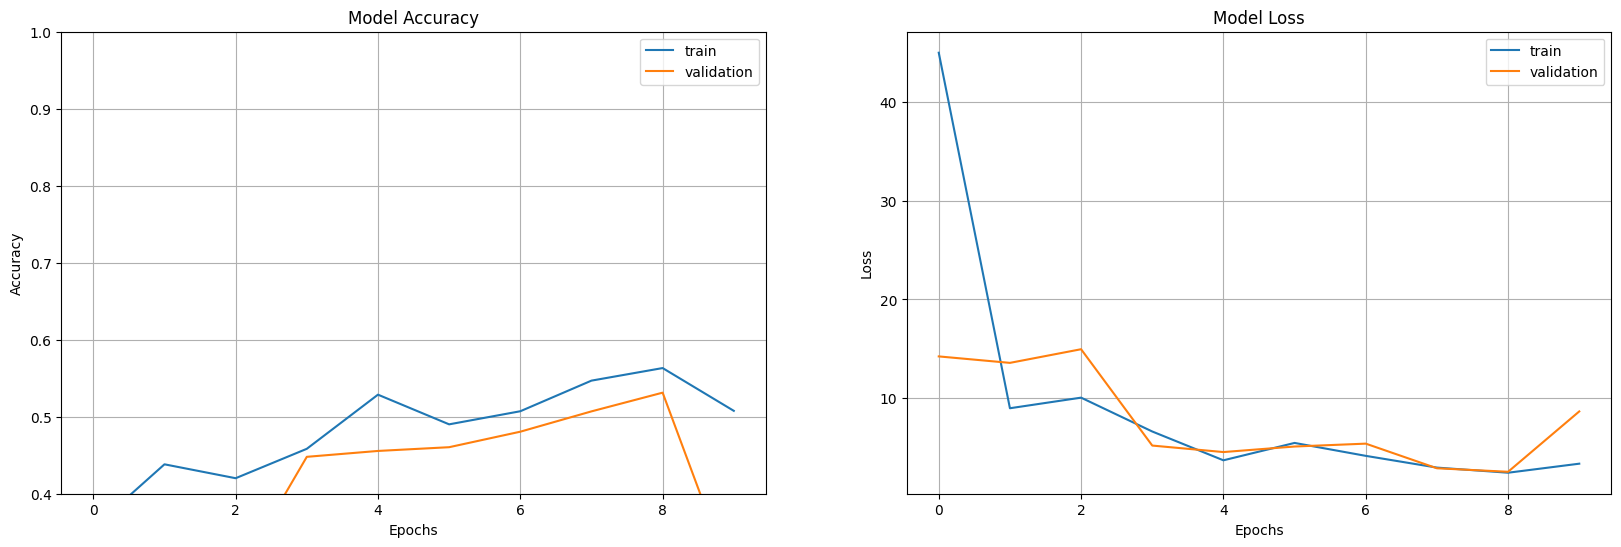

In [62]:
# Ваш код
plt.figure(figsize=(20, 6))

ax = plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

ax = plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.show()

### 2.5. Подготовьте набор проверочных данных (examples)

In [ ]:
# Ваш код
# Изображения загружены с устройства во временную среду

### 2.6. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из подготовленных проверочных данных (п.2.5)

In [64]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

In [72]:
def classify(image):
  labels = ['chicken', 'cow', 'horse', 'sheep']
  image_resized = cv2.resize(image, (128, 128))
  image = np.expand_dims(image_resized,axis=0)
  preds = my_new_model.predict(image).flatten()
  confidences = {labels[i]: float(preds[i]) for i in range(len(preds))}

  return confidences

In [74]:
# Ваш код
import gradio as gr

interface = gr.Interface(
    fn=classify,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(class_names)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/sheep.jpg",
              "/content/horse.jpg",
              "/content/chicken.jpg",
              "/content/cow.jpg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c3c2b3c520dcc28b94.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [75]:
my_new_model.save('sus_model.keras')

# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%capture
!unzip EuroSat.zip -d eurosat

In [4]:
from imutils import paths
import random

imagesPath = sorted(list(paths.list_images('/content/eurosat/EuroSAT')))
random.shuffle(imagesPath)

In [5]:
def load_images(imagePaths):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath)

In [6]:
data = np.array(data)
labels = np.array(labels)

data.shape

(27000, 64, 64, 3)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

data_n = keras.applications.vgg16.preprocess_input(data)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.05)
(X_train, X_val, Y_train, Y_val) = train_test_split(X_train, Y_train, test_size=0.3)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(17955, 64, 64, 3)
(7695, 64, 64, 3)
(1350, 64, 64, 3)


In [8]:
Y_train[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [9]:
# Ваш код
vgg_model = keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3),
    pooling='avg',
)

for layer in vgg_model.layers:
  layer.trainable = False

vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [10]:
# Ваш код
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input

input_tensor = vgg_model.input
x = vgg_model.output

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

my_model = Model(inputs=input_tensor, outputs=output_tensor)

my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │              

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
my_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [12]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="vgg_best.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

In [13]:
vgg_history = my_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=57, epochs=20, callbacks=[early_stopping, checkpoint])

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7142 - loss: 1.8893 - val_accuracy: 0.8568 - val_loss: 0.5606
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.8982 - loss: 0.3565 - val_accuracy: 0.8454 - val_loss: 0.6081
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9242 - loss: 0.2278 - val_accuracy: 0.8798 - val_loss: 0.4586
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9451 - loss: 0.1617 - val_accuracy: 0.8789 - val_loss: 0.4745
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.9581 - loss: 0.1215 - val_accuracy: 0.8691 - val_loss: 0.5874
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9621 - loss: 0.1116 - val_accuracy: 0.8811 - val_loss: 0.4939
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.9773 - loss: 0.0743 - val_accuracy: 0.8824 - val_loss: 0.5085
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9733 - loss: 0.0817 - 



### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



In [14]:
# Ваш код
from sklearn.metrics import classification_report

predictions = my_model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

241/241 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step
                      precision    recall  f1-score   support

          AnnualCrop       0.91      0.91      0.91       868
              Forest       0.93      0.96      0.94       816
HerbaceousVegetation       0.81      0.94      0.87       861
             Highway       0.81      0.68      0.74       698
          Industrial       0.93      0.92      0.93       739
             Pasture       0.90      0.84      0.87       593
       PermanentCrop       0.84      0.78      0.81       702
         Residential       0.92      0.95      0.93       838
               River       0.78      0.84      0.81       715
             SeaLake       0.98      0.95      0.97       865

            accuracy                           0.88      7695
           macro avg       0.88      0.88      0.88      7695
        weighted avg       0.88      0.88      0.88      7695



241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step


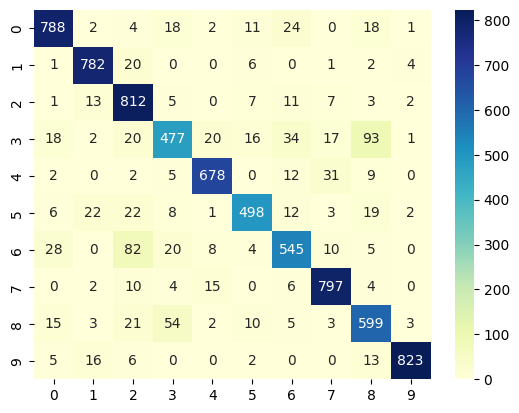

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = my_model.predict(X_val, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [17]:
predictions = my_model.predict(X_test, batch_size=32)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
                      precision    recall  f1-score   support

          AnnualCrop       0.96      0.83      0.89       164
              Forest       0.95      0.96      0.96       156
HerbaceousVegetation       0.82      0.93      0.87       138
             Highway       0.88      0.73      0.80       149
          Industrial       0.96      0.91      0.93       121
             Pasture       0.84      0.86      0.85        98
       PermanentCrop       0.83      0.84      0.83       122
         Residential       0.88      0.95      0.91       130
               River       0.79      0.91      0.84       127
             SeaLake       0.98      0.99      0.98       145

            accuracy                           0.89      1350
           macro avg       0.89      0.89      0.89      1350
        weighted avg       0.89      0.89      0.89      1350



43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


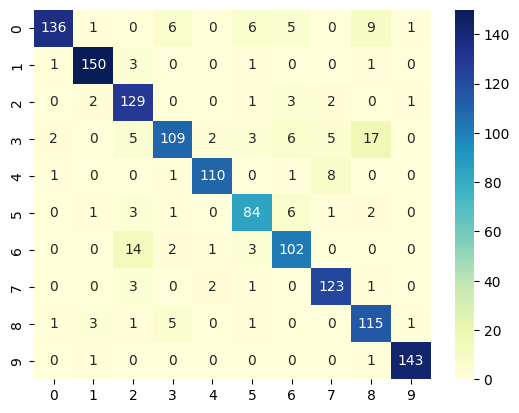

In [18]:
# Получим прогнозы по тестовым даннным
Y_pred = my_model.predict(X_test, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_test = Y_test.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_test, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

-----------------------------------------
**Ваш вывод**
-----------------------------------------
Количество эпох может привести к переобучению модели, поэтому следует внимательно подходить к выбору их количества или же использовать раннюю остановку обучения (EarlyStopping).

Размер пакета лучше выбирать не слишком маленький и не слишком большой, чтобы обучение происходило с оптимальной скоростью. Лучше использовать степени двойки (32, 64 и подобное).

Функцию активации следует выбирать в зависимости от назначения слоя и модели в целом. Для задач классификации в скрытых слоях чаще всего используют RuLu, а на последнем слое softmax (при мультиклассовой классификации).

Оптимизатор следует выбирать исходя из количества данных, однако самый распрастраненный и оптимальный вариант Adam.

В качестве регуляризации распространенными вариантами являются Dropout и BatchNormalization. Dropout позволяет бороться с переобучением, случайным образом отключает некоторые нейроны в процессе обучения. BatchNormalization позволяет в некоторой мере ускорить процесс обучения, эффективнее себя показывает при использовании в глубоких сетях.

Выбирать каждый из параметров следует исходя из задачи, которая стоит перед моделью, а также основываясь на опытах. Лучше предварительно протестировать разные варианты этих параметров, чтобы понять, какой будет более оптимальным. Или же можно прибегнуть к поиску решения аналогичных задач и посмотреть, какие параметры используются там.